In [1]:
import requests

In [6]:
appid = 'd1526a9039658a6f76950cff21823aff'

In [62]:
city = 'Utrecht'

In [63]:
url = 'http://api.openweathermap.org/data/2.5/weather'
url += '?appid=' + appid
url += '&units=metric'
url += '&mode=json'
url += '&q=' + city

url

'http://api.openweathermap.org/data/2.5/weather?appid=d1526a9039658a6f76950cff21823aff&units=metric&mode=json&q=Utrecht'

In [64]:
response = requests.get(url)

In [59]:
type(response)

requests.models.Response

In [60]:
dir(response)

['__attrs__',
 '__bool__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__enter__',
 '__eq__',
 '__exit__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__nonzero__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_content',
 '_content_consumed',
 '_next',
 'apparent_encoding',
 'close',
 'connection',
 'content',
 'cookies',
 'elapsed',
 'encoding',
 'headers',
 'history',
 'is_permanent_redirect',
 'is_redirect',
 'iter_content',
 'iter_lines',
 'json',
 'links',
 'next',
 'ok',
 'raise_for_status',
 'raw',
 'reason',
 'request',
 'status_code',
 'text',
 'url']

In [61]:
response.status_code

404

In [55]:
data = response.json()
data

{'cod': '404', 'message': 'city not found'}

In [24]:
temperatuur = data['main']['temp']
temperatuur

18.24

In [41]:
print(f'Het is nu {data["main"]["temp"]:.0f}\u2103 in {city}.')

Het is nu 18℃ in Paris.


### Forecast

In [81]:
url = 'http://api.openweathermap.org/data/2.5/forecast/daily'
url += '?appid=' + appid
url += '&units=metric'
url += '&mode=json'
url += '&cnt=16'
url += '&q=' + city

url

'http://api.openweathermap.org/data/2.5/forecast/daily?appid=d1526a9039658a6f76950cff21823aff&units=metric&mode=json&cnt=16&q=Utrecht'

In [82]:
response = requests.get(url)

In [83]:
response.status_code

200

In [84]:
data = response.json()
data

{'city': {'id': 2745909,
  'name': 'Provincie Utrecht',
  'coord': {'lon': 5.25, 'lat': 52},
  'country': 'NL',
  'population': 1170622,
  'timezone': 3600},
 'cod': '200',
 'message': 4.3798574,
 'cnt': 16,
 'list': [{'dt': 1730718000,
   'sunrise': 1730702385,
   'sunset': 1730736322,
   'temp': {'day': 12.25,
    'min': 4.43,
    'max': 13.08,
    'night': 6.69,
    'eve': 9.93,
    'morn': 4.52},
   'feels_like': {'day': 11.2, 'night': 4.3, 'eve': 8.2, 'morn': 1.98},
   'pressure': 1027,
   'humidity': 64,
   'weather': [{'id': 803,
     'main': 'Clouds',
     'description': 'broken clouds',
     'icon': '04d'}],
   'speed': 4.06,
   'deg': 99,
   'gust': 7.04,
   'clouds': 52,
   'pop': 0},
  {'dt': 1730804400,
   'sunrise': 1730788893,
   'sunset': 1730822618,
   'temp': {'day': 11.37,
    'min': 4.82,
    'max': 12.68,
    'night': 6.75,
    'eve': 7.98,
    'morn': 5.19},
   'feels_like': {'day': 10.08, 'night': 6.75, 'eve': 7.98, 'morn': 2.98},
   'pressure': 1023,
   'humidit

In [123]:
from datetime import datetime
import locale
import statistics

locale.setlocale(locale.LC_ALL, 'nl_NL')

forecast = {}
for day_forecast in data['list']:
    dt = datetime.fromtimestamp(day_forecast['dt'])
    temp = day_forecast['temp']['day']
    print(dt.strftime('%a %d %B'), temp)
    forecast[dt] = temp

ma 04 november 12.25
di 05 november 11.37
wo 06 november 12.73
do 07 november 12.08
vr 08 november 12.18
za 09 november 13.91
zo 10 november 12.63
ma 11 november 10.98
di 12 november 9.43
wo 13 november 9.41
do 14 november 7.44
vr 15 november 4.58
za 16 november 7.44
zo 17 november 7.88
ma 18 november 6.8
di 19 november 5.45


In [130]:
dagen = [day_forecast['temp']['day'] for day_forecast in data['list']]

gemiddelde = sum(dagen) / len(dagen)
print(gemiddelde)

import statistics
gemiddelde = statistics.mean(dagen)
stdev = statistics.stdev(dagen)
print(gemiddelde, stdev)

9.785
9.785 2.8808609824148057


(array([0.06698821, 0.13397642, 0.06698821, 0.06698821, 0.20096463]),
 array([ 4.58 ,  6.446,  8.312, 10.178, 12.044, 13.91 ]),
 <BarContainer object of 5 artists>)

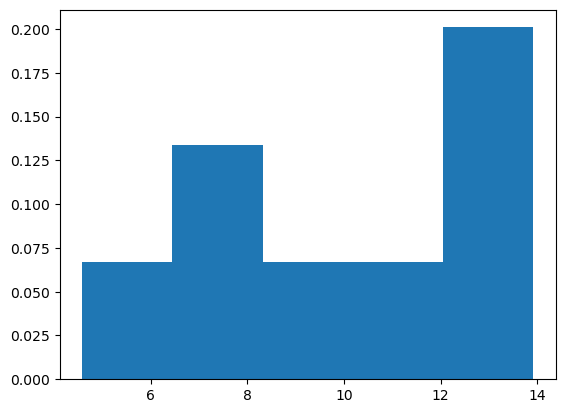

In [142]:
plt.hist(dagen, bins=5, density=True)

In [141]:
plt.kde(dagen)

AttributeError: module 'matplotlib.pyplot' has no attribute 'kde'

In [136]:
median = statistics.median(dagen)

median

10.205

In [135]:
statistics.quantiles(dagen, n=4)

[7.44, 10.205, 12.2325]

{'whiskers': [<matplotlib.lines.Line2D at 0x308148e10>,
 'caps': [<matplotlib.lines.Line2D at 0x30814a0d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x308148650>],
 'medians': [<matplotlib.lines.Line2D at 0x30814b250>],
 'fliers': [<matplotlib.lines.Line2D at 0x30814ba90>],
 'means': []}

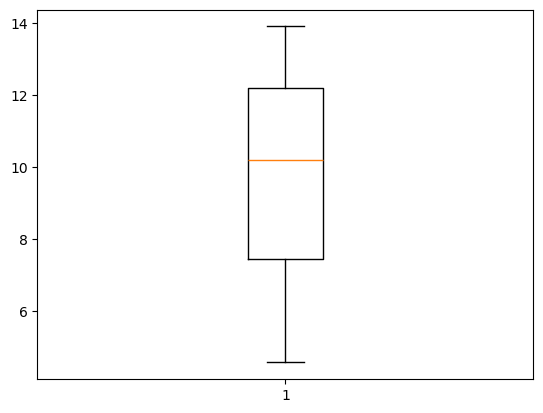

In [133]:
plt.boxplot(dagen)

{'bodies': [<matplotlib.collections.PolyCollection at 0x30804af10>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x307f0a490>,
 'cmins': <matplotlib.collections.LineCollection at 0x3081d7910>,
 'cbars': <matplotlib.collections.LineCollection at 0x3081dcb90>}

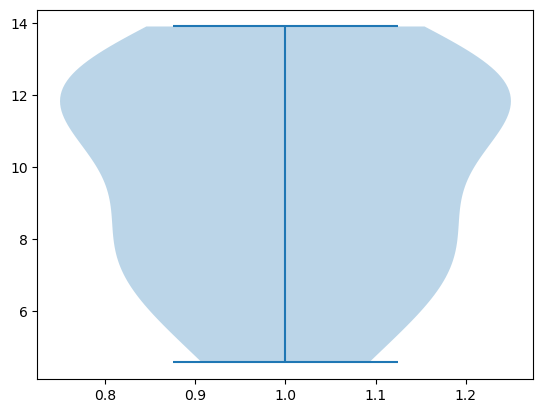

In [137]:
plt.violinplot(dagen)

In [128]:
sorted(dagen)

[4.58,
 5.45,
 6.8,
 7.44,
 7.44,
 7.88,
 9.41,
 9.43,
 10.98,
 11.37,
 12.08,
 12.18,
 12.25,
 12.63,
 12.73,
 13.91]

In [117]:
forecast

{datetime.datetime(2024, 11, 4, 12, 0): 12.25,
 datetime.datetime(2024, 11, 5, 12, 0): 11.37,
 datetime.datetime(2024, 11, 6, 12, 0): 12.73,
 datetime.datetime(2024, 11, 7, 12, 0): 12.08,
 datetime.datetime(2024, 11, 8, 12, 0): 12.18,
 datetime.datetime(2024, 11, 9, 12, 0): 13.91,
 datetime.datetime(2024, 11, 10, 12, 0): 12.63,
 datetime.datetime(2024, 11, 11, 12, 0): 10.98,
 datetime.datetime(2024, 11, 12, 12, 0): 9.43,
 datetime.datetime(2024, 11, 13, 12, 0): 9.41,
 datetime.datetime(2024, 11, 14, 12, 0): 7.44,
 datetime.datetime(2024, 11, 15, 12, 0): 4.58,
 datetime.datetime(2024, 11, 16, 12, 0): 7.44,
 datetime.datetime(2024, 11, 17, 12, 0): 7.88,
 datetime.datetime(2024, 11, 18, 12, 0): 6.8,
 datetime.datetime(2024, 11, 19, 12, 0): 5.45}

In [113]:
gemiddelde1 = statistics.mean(forecast.values())
gemiddelde2 = statistics.fmean(forecast.values())

print(f'Gemiddeld: {gemiddelde1}')
print(f'Gemiddeld: {gemiddelde2}')

Gemiddeld: 9.785
Gemiddeld: 9.785


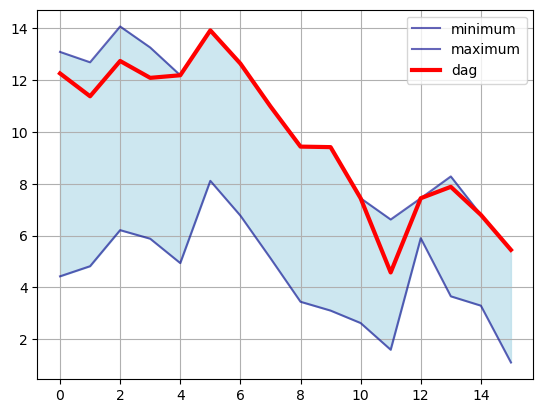

In [173]:

minimum = [day_forecast['temp']['min'] for day_forecast in data['list']]
dagen = [day_forecast['temp']['day'] for day_forecast in data['list']]
maximum = [day_forecast['temp']['max'] for day_forecast in data['list']]

import matplotlib.pyplot as plt

plt.fill_between(range(len(dagen)), minimum, maximum, color='lightblue', alpha=0.6)
plt.plot(minimum, label='minimum', color='darkblue', alpha=0.6)
plt.plot(maximum, label='maximum', color='darkblue', alpha=0.6)
plt.plot(dagen, label='dag', color='red', linewidth=3)

plt.grid()
plt.legend(loc='upper right')
plt.show()

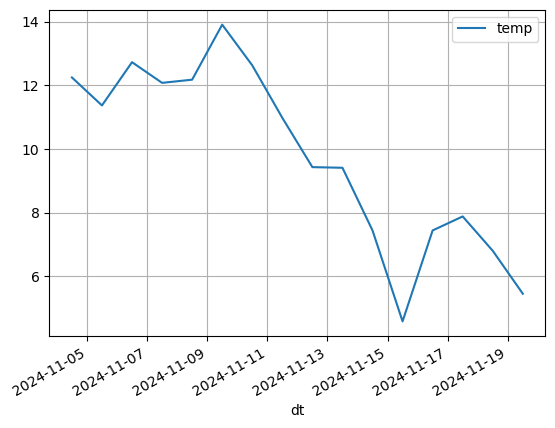

In [151]:
import pandas as pd

df = pd.DataFrame({'dt': forecast.keys(), 'temp':forecast.values()})
df.set_index('dt', inplace=True)

df.plot()
plt.grid()
plt.show()

In [119]:
df

,dt,temp
0,2024-11-04 12:00:00,12.25
1,2024-11-05 12:00:00,11.37
2,2024-11-06 12:00:00,12.73
3,2024-11-07 12:00:00,12.08
4,2024-11-08 12:00:00,12.18
5,2024-11-09 12:00:00,13.91
6,2024-11-10 12:00:00,12.63
7,2024-11-11 12:00:00,10.98
8,2024-11-12 12:00:00,9.43
9,2024-11-13 12:00:00,9.41


In [165]:
import statistics

statistics.mean([1,3,5])


import statistics as sts

sts.mean([1,3,5])


from statistics import mean

mean([1,3,5])

3

In [162]:
dir(statistics)

['Counter',
 'Decimal',
 'Fraction',
 'LinearRegression',
 'NormalDist',
 'StatisticsError',
 '_SQRT2',
 '__all__',
 '__annotations__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 '_coerce',
 '_convert',
 '_decimal_sqrt_of_frac',
 '_exact_ratio',
 '_fail_neg',
 '_float_sqrt_of_frac',
 '_integer_sqrt_of_frac_rto',
 '_isfinite',
 '_mean_stdev',
 '_normal_dist_inv_cdf',
 '_sqrt_bit_width',
 '_ss',
 '_sum',
 'bisect_left',
 'bisect_right',
 'correlation',
 'covariance',
 'defaultdict',
 'erf',
 'exp',
 'fabs',
 'fmean',
 'fsum',
 'geometric_mean',
 'groupby',
 'harmonic_mean',
 'hypot',
 'linear_regression',
 'log',
 'math',
 'mean',
 'median',
 'median_grouped',
 'median_high',
 'median_low',
 'mode',
 'mul',
 'multimode',
 'namedtuple',
 'numbers',
 'pstdev',
 'pvariance',
 'quantiles',
 'random',
 'reduce',
 'repeat',
 'sqrt',
 'stdev',
 'sys',
 'tau',
 'variance']